# Rawdata preprocessing

In [1]:
import pandas as pd
import numpy as np


filename = 'fashion20000_rawdata.json'

df = pd.read_json(filename)
#df.head()

In [8]:
base_df = df[['id','username','hashtags']]
#base_df.head()
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19631 entries, 0 to 19630
Data columns (total 3 columns):
id          19631 non-null object
username    19631 non-null object
hashtags    19631 non-null object
dtypes: object(3)
memory usage: 460.2+ KB


In [9]:
# user 1명당 hashtag 1개씩만 사용하도록 합니다. (광고성 게시물이 특정 태그의 갯수를 늘리기 때문에)
groupby_df = base_df.groupby('username').agg({'hashtags' : 'sum'})
groupby_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11253 entries,  to zxed_umpq
Data columns (total 1 columns):
hashtags    11253 non-null object
dtypes: object(1)
memory usage: 175.8+ KB


In [10]:
groupby_df.head()

,hashtags
username,
,"[ktmboy, modellife, wanderlust, ktmlife, biker..."
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0hsehoe,[]


In [13]:
# 잘못된 데이터들을 처리해줍니다.
fashion_df = groupby_df[groupby_df.astype(str)['hashtags'] != '[]']
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9963 entries,  to zxed_umpq
Data columns (total 1 columns):
hashtags    9963 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


In [14]:
fashion_df.head()

,hashtags
username,
,"[ktmboy, modellife, wanderlust, ktmlife, biker..."
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."


In [15]:
fashion_df = fashion_df[1:]
fashion_df.head()

,hashtags
username,
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."
0ption,"[fashiondesigner, fashionlover, bmorefashion, ..."


In [16]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


In [17]:
# 태그가 몇번 나왔는지 세어주는 함수입니다.
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

sort_dict = getTagsDict(fashion_df)

In [18]:
sort_dict[-10:]

[('fashiondesigner', 3400),
 ('fashionstyle', 3721),
 ('fashionable', 3836),
 ('model', 3945),
 ('fashionista', 4760),
 ('style', 5697),
 ('fashionblogger', 5804),
 ('fashionweek', 7274),
 ('fashionshow', 10019),
 ('fashion', 10600)]

In [21]:
# 중복을 제거해줍니다. (한 글에 동일한 태그 여러 번)

tag_df = fashion_df['hashtags']

for i in range(len(tag_df)):
#     if "fashion" in tag_df[i] == False:
#         print(tag_df[i])
    tag_df[i] = list(set(tag_df[i]))

fashion_df['hashtags'] = tag_df


In [22]:
fashion_dict = getTagsDict(fashion_df)
print(fashion_dict[-10:])
print(fashion_df.info())

[('instagood', 1823), ('fashionstyle', 1830), ('fashionable', 2014), ('model', 2169), ('fashionista', 2399), ('fashionblogger', 2978), ('style', 3152), ('fashionweek', 4102), ('fashionshow', 5349), ('fashion', 6460)]
<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 475.7+ KB
None


In [23]:
fashion_dict[-30:]

[('streetstyle', 861),
 ('instastyle', 868),
 ('photography', 918),
 ('fashionaddict', 962),
 ('fashiondesign', 981),
 ('fashiondaily', 989),
 ('styleblogger', 1084),
 ('fashionlover', 1084),
 ('fashionphotography', 1085),
 ('ootd', 1200),
 ('photooftheday', 1211),
 ('fashionpost', 1230),
 ('beautiful', 1247),
 ('beauty', 1251),
 ('fashionblog', 1310),
 ('fashiongram', 1326),
 ('love', 1405),
 ('fashiondiaries', 1413),
 ('instafashion', 1495),
 ('fashiondesigner', 1654),
 ('instagood', 1823),
 ('fashionstyle', 1830),
 ('fashionable', 2014),
 ('model', 2169),
 ('fashionista', 2399),
 ('fashionblogger', 2978),
 ('style', 3152),
 ('fashionweek', 4102),
 ('fashionshow', 5349),
 ('fashion', 6460)]

In [24]:
len(fashion_dict)
# 태그의 종류가 5만개입니다.

50297

In [25]:
fashion_dict = fashion_dict[-300:]
# 가장 빈도수가 높은 태그 300개만 얻어냅니다.

In [26]:
print(len(fashion_dict))

300


In [27]:
tag_list = []
for i in fashion_dict:
    tag_list.append(i[0])

print(tag_list)
print(len(tag_list))

['inspo', 'business', 'nofilter', 'fashionicon', 'lifestyleblogger', 'celebrity', 'top', 'hairstylist', 'bags', 'gym', 'family', 'fashionstudy', 'bloggerstyle', 'creative', 'balmain', 'стиль', 'bridal', 'picture', 'hot', 'red', 'usa', 'whatiworetoday', 'outfitpost', 'details', 'followers', 'modafeminina', 'mylook', 'blackandwhite', 'kidsfashion', 'outfits', 'shop', 'currentlywearing', 'india', 'trending', 'todaysoutfit', 'hairstyles', 'party', 'portraitphotography', 'fw19', 'fashionbag', 'runwaymodel', 'мода', 'designers', 'like4likes', 'sale', 'prilaga', 'trends', 'fashioninspiration', 'heels', 'styling', 'bhfyp', 'bride', 'weheartit', 'louisvuitton', 'berlin', 'color', 'milano', 'outfitinspiration', 'fashionshoes', 'onlineshopping', 'event', 'new', 'motivation', 'boutique', 'womenswear', 'swagg', 'streetphotography', 'food', 'luxurylifestyle', 'insta', 'modelling', 'sexy', 'modelagency', 'italy', 'f4f', 'guy', 'fashionist', 'fresh', 'fashionlook', 'newcollection', 'ootdfashion', 'men

# Affinity Matrix

In [28]:
# Affinity Matrix를 만들기 위힌 dataFrame을 만드는 함수입니다.

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(index = np.arange(0,len(df)),columns=taglist)    
    
    zero_list = list()
    for i in range(len(taglist)):
        zero_list.append(0)
    
    i = 0
    for index,row in df.iterrows():
        
        tmp_df = df.loc[index]
        tmp_list = zero_list.copy()
        
        hashlist = tmp_df['hashtags']
        
        for tag in hashlist:
            if tag in taglist:
                tagindex = taglist.index(tag)
                tmp_list[tagindex] = 1
        
        result_df.loc[i] = tmp_list
        i += 1
    
    return result_df
        

In [29]:
before_corr = get_DataFrame_for_affinity(fashion_df,tag_list)

In [30]:
before_corr

,inspo,business,nofilter,fashionicon,lifestyleblogger,celebrity,top,hairstylist,bags,gym,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [31]:
corr_affinity = before_corr.corr(method = 'pearson')

In [32]:
corr_affinity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, inspo to fashion
Columns: 300 entries, inspo to fashion
dtypes: float64(300)
memory usage: 705.5+ KB


In [33]:
corr_affinity['fashionweek'].sort_values(ascending =False)

fashionweek           1.000000
fashionblogger        0.443652
fashionable           0.434068
fashionista           0.403167
fashiondiaries        0.393550
fashionstyle          0.373689
fashionblog           0.362479
fashionpost           0.340087
fashiongram           0.338650
fashiondesigner       0.314595
fashiondaily          0.312230
fashionlover          0.301714
styleblogger          0.282065
fashionphotography    0.269242
fashiondesign         0.267013
fashionaddict         0.261635
styleblog             0.254659
instastyle            0.247039
instafashion          0.244667
style                 0.231614
styleoftheday         0.224070
fashiongirl           0.220944
streetstyle           0.197776
styles                0.193653
tagblender            0.193627
fashions              0.185389
instatag              0.183390
instagramanet         0.182814
outfitoftheday        0.177358
fashionstylist        0.174414
                        ...   
nofilter             -0.042492
india   

In [34]:
corr_affinity

,inspo,business,nofilter,fashionicon,lifestyleblogger,celebrity,top,hairstylist,bags,gym,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
inspo,1.000000,-0.007280,-0.007280,-0.007331,0.034353,0.006420,-0.007431,-0.007431,-0.007431,0.006001,...,-0.015862,0.002368,-0.013444,0.026772,-0.017568,-0.022064,0.069357,0.017705,-0.032464,0.010699
business,-0.007280,1.000000,-0.007280,-0.007331,0.006564,0.006420,0.006278,0.019988,-0.007431,0.006001,...,-0.003603,-0.009873,0.001310,-0.024914,-0.014796,-0.011709,0.003106,-0.008782,-0.027710,0.013181
nofilter,-0.007280,-0.007280,1.000000,-0.007331,-0.007331,-0.007381,0.006278,0.006278,-0.007431,0.006001,...,0.076082,-0.040476,-0.040000,-0.016299,-0.036969,-0.035007,-0.004538,-0.042492,-0.051476,0.033037
fashionicon,-0.007331,-0.007331,-0.007331,1.000000,0.006418,-0.007433,-0.007483,-0.007483,-0.007483,-0.007583,...,-0.037619,0.102093,0.071042,-0.031068,0.023178,0.049305,0.014938,0.057254,0.049104,0.013958
lifestyleblogger,0.034353,0.006564,-0.007331,0.006418,1.000000,0.019981,0.006133,-0.007483,0.006133,0.005856,...,-0.007180,0.004833,0.006569,-0.011105,0.012168,0.067302,0.014938,0.014208,-0.024068,0.018888
celebrity,0.006420,0.006420,-0.007381,-0.007433,0.019981,1.000000,0.019514,-0.007535,-0.007535,0.005714,...,-0.016755,-0.019906,-0.020261,0.019512,-0.007711,0.004798,0.019069,-0.015370,0.021725,0.019622
top,-0.007431,0.006278,0.006278,-0.007483,0.006133,0.019514,1.000000,0.059587,-0.007586,0.018833,...,-0.020196,-0.020324,-0.026494,0.010328,-0.005598,-0.013749,0.000674,-0.016240,-0.030906,0.032508
hairstylist,-0.007431,0.019988,0.006278,-0.007483,-0.007483,-0.007535,0.059587,1.000000,-0.007586,0.005573,...,-0.035213,-0.014327,-0.023602,0.024397,-0.024610,-0.011213,-0.019302,-0.039835,0.034304,0.008185
bags,-0.007431,-0.007431,-0.007431,-0.007483,0.006133,-0.007535,-0.007586,-0.007586,1.000000,-0.007687,...,0.000827,-0.011328,-0.006253,-0.034694,0.010698,-0.003603,0.010662,0.002637,-0.023919,0.025211
gym,0.006001,0.006001,0.006001,-0.007583,0.005856,0.005714,0.018833,0.005573,-0.007687,1.000000,...,0.038268,-0.032988,-0.030158,0.036758,-0.028262,-0.025083,0.013893,-0.027263,-0.042169,0.038575


# max_values

In [36]:
max_values = []
for tag in tag_list:
    
    series = corr_affinity[tag].sort_values(ascending = False)
    max_value = [series[1],series[2],series[3],series[4],series[5]]
    max_list = []
    for i in range(5):
        max_list.append(series[series == max_value[i]].index[0])
    max_values.append(max_list)

In [38]:
print(max_values[0][0])
print(corr_affinity['inspo'].sort_values(ascending = False))


modelagency
inspo                  1.000000
modelagency            0.189575
shooting               0.171368
prilaga                0.146763
modellife              0.138351
photoshoot             0.109135
photo                  0.100557
inspiration            0.090972
art                    0.085538
runway                 0.074321
style                  0.069357
photography            0.062953
modeling               0.061036
trend                  0.052929
ootd                   0.052161
trendy                 0.051735
photooftheday          0.051668
fashioninspo           0.051150
beauty                 0.046342
blogger                0.040244
lookoftheday           0.038326
streetstyle            0.037016
lifestyleblogger       0.034353
fashionlovers          0.033608
outfit                 0.032822
outfitpost             0.031012
details                0.030467
streetfashion          0.029276
trending               0.029176
trends                 0.027293
                         ...

In [39]:
len(max_values)

300

In [40]:
len(max_values[0])

5

# Clustering

In [41]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

sc = SpectralClustering()
km = KMeans()

In [42]:
sc.fit(corr_affinity)
km.fit(corr_affinity)
predict = pd.DataFrame(sc.fit_predict(corr_affinity))
predict.columns = ['predict']
predict.head()

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/opt/conda/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


,predict
0,1
1,1
2,1
3,1
4,1


# Build Node

In [43]:
node_df = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])

In [44]:
node_df

,Tag,Freq
0,inspo,72
1,business,72
2,nofilter,72
3,fashionicon,73
4,lifestyleblogger,73
5,celebrity,74
6,top,75
7,hairstylist,75
8,bags,75
9,gym,77


In [48]:
node_df['Group'] = predict
node_df

,Tag,Freq,Group
0,inspo,72,1
1,business,72,1
2,nofilter,72,1
3,fashionicon,73,1
4,lifestyleblogger,73,1
5,celebrity,74,1
6,top,75,1
7,hairstylist,75,1
8,bags,75,1
9,gym,77,1


In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

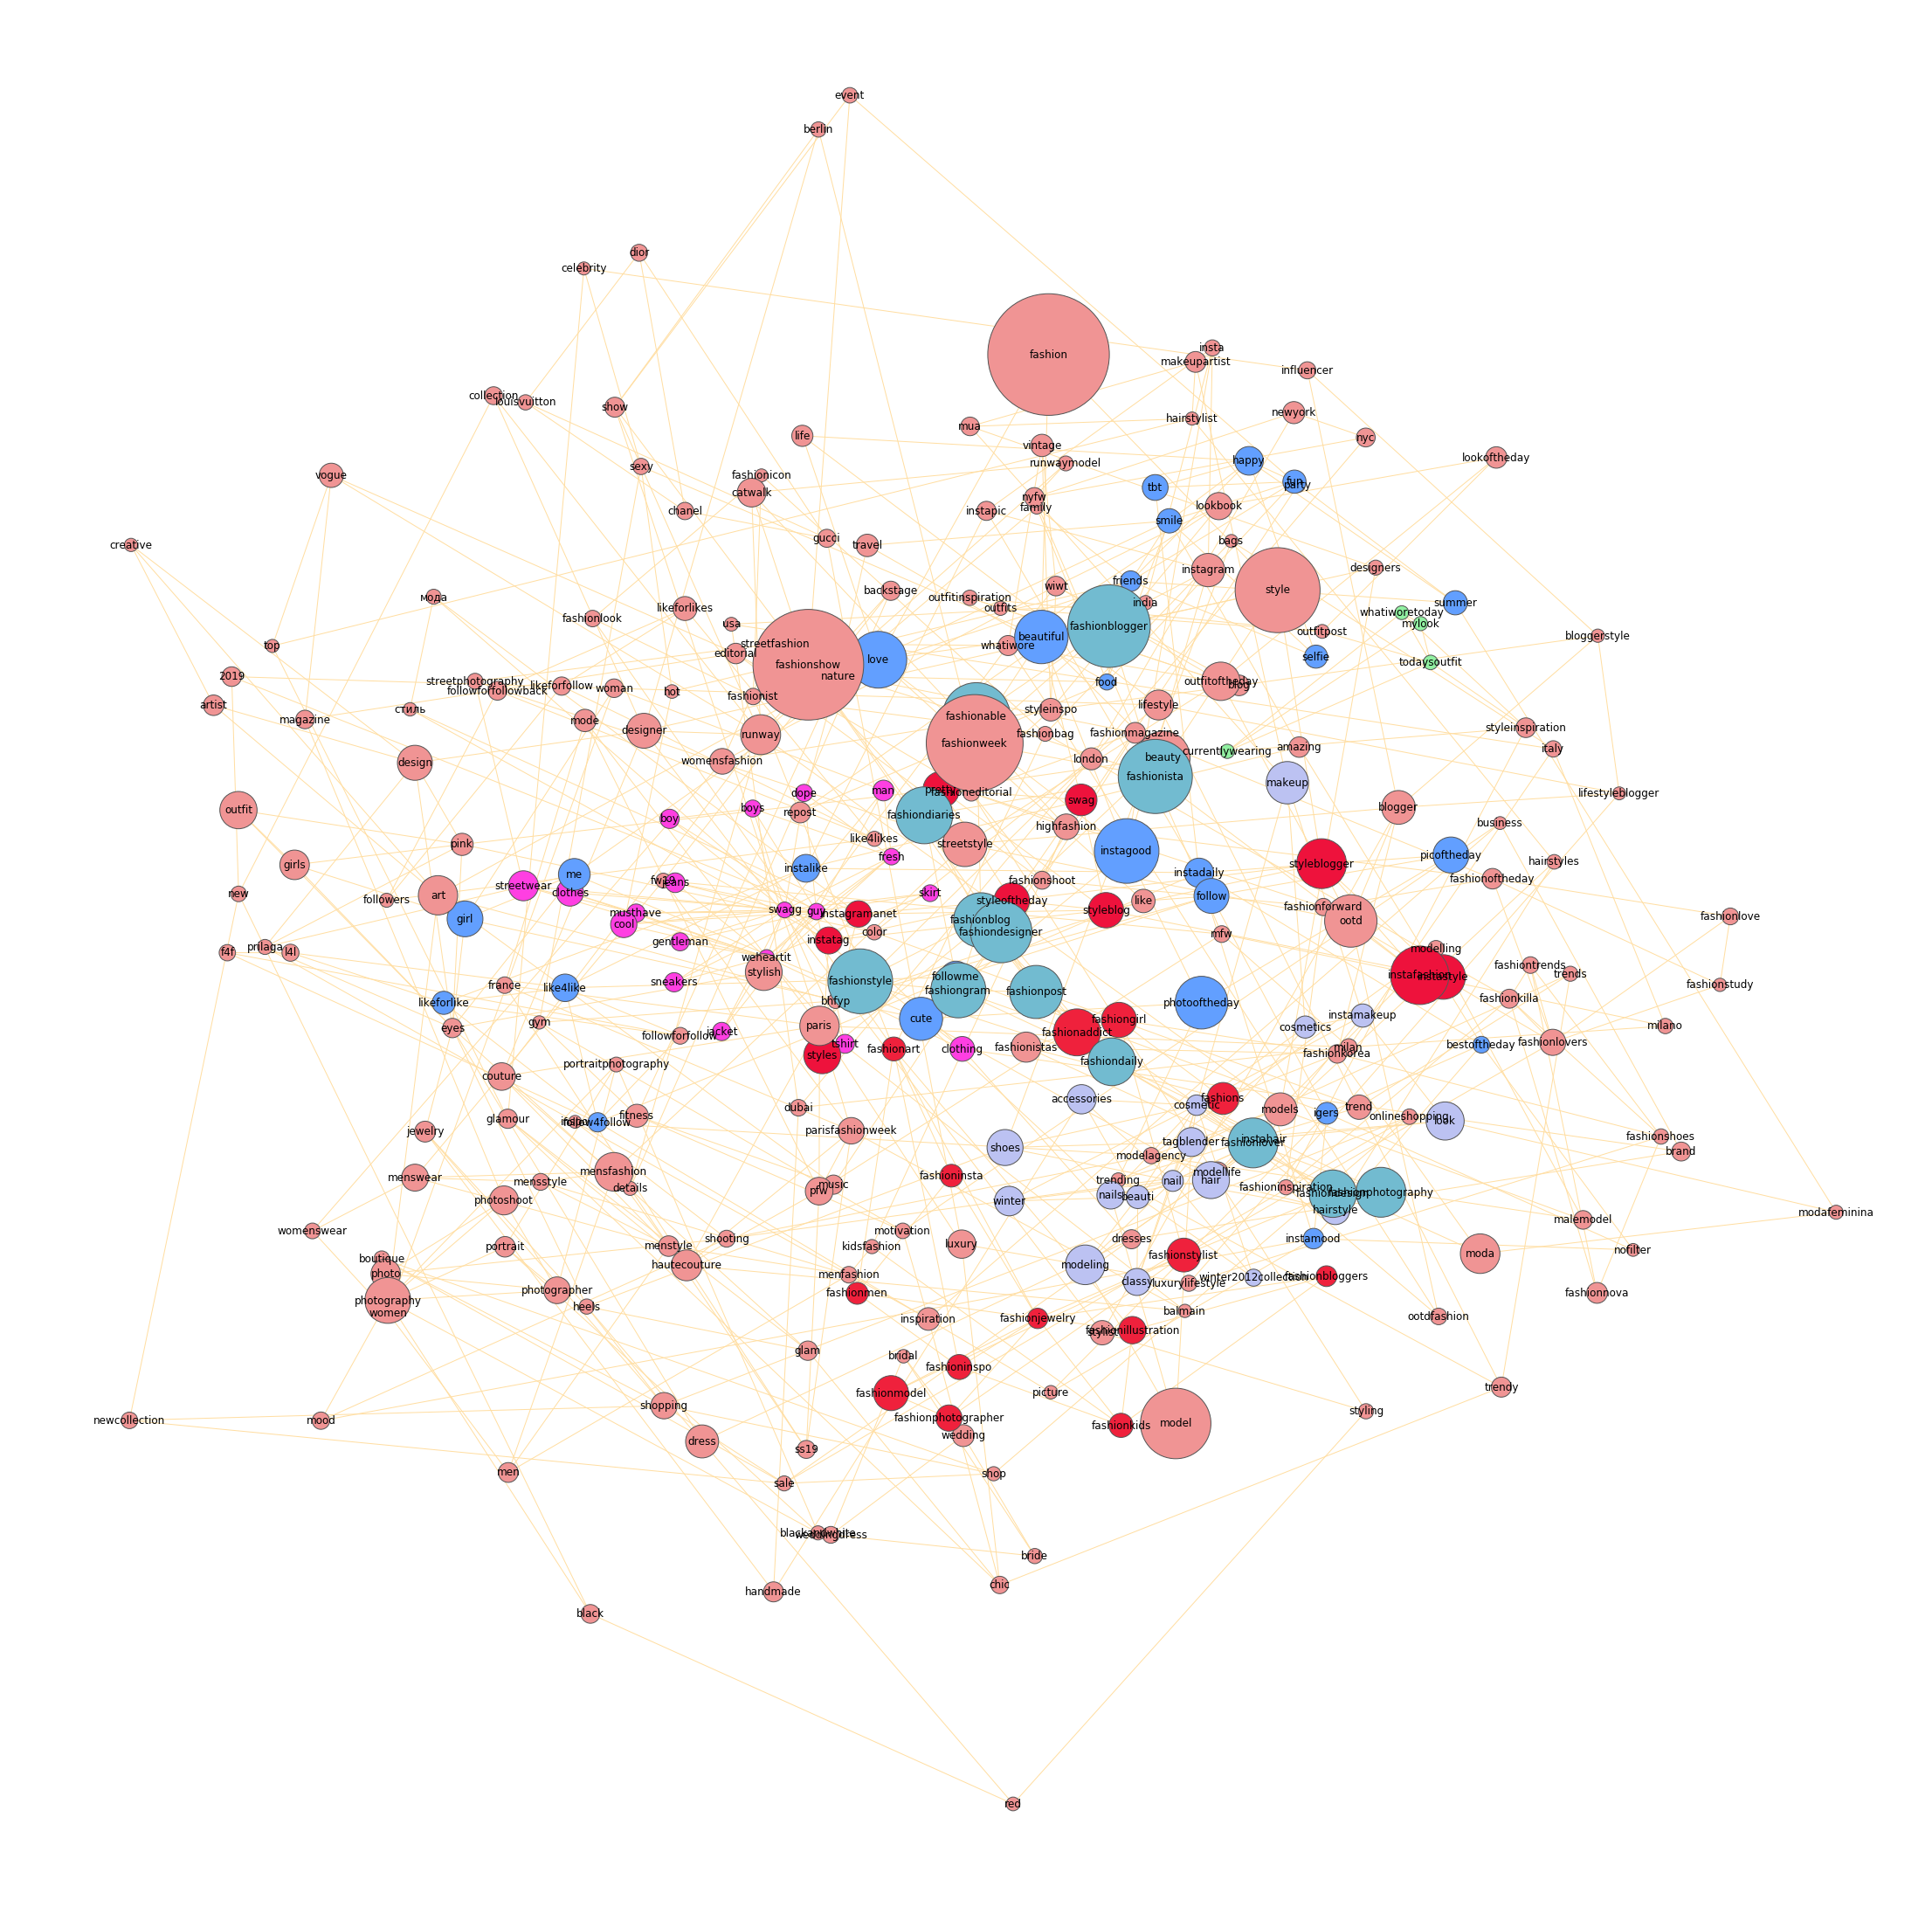

In [47]:
G = nx.Graph(day = "Stackoverflow")

for index,row in node_df.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    

# #     
# for index1,row1 in node_df.iterrows():
#     for index2,row2 in node_df.iterrows():
#         if row1['Tag'] == row2['Tag']:
#             continue
#         if corr_affinity[row1['Tag']][row2['Tag']] > -1:
#             G.add_edge(row1['Tag'],row2['Tag'],weight = corr_affinity[row1['Tag']][row2['Tag']]*3)


## corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
i = 0
for index1,row1 in node_df.iterrows():
    for j in range(3):
        try:
            G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
        except:
            print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
    
    i += 1

color_map = {1:'#f09494', 2:'#ee123c', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#FF3FE2', 0:'#ef213c', 8:'#9B62FF', 9:'#17A7FF', 10:'#FFA925', 11:'#5D484B'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('Hash_Network_Graph_image/fashion20000_top100_Spectral_maxvalues_3')